In [1]:
from caveclient import CAVEclient
from intern import array
import pickle
import numpy as np
from agents import data_loader
from cloudvolume import CloudVolume
from membrane_detection import membranes
from agents.scripts import precompute_membrane_vectors, create_post_matrix, merge_paths, get_soma
import agents.sensor
from agents.run import run_agents
import aws.sqs as sqs
import sys
import time
import ast
import pandas as pd
import agents.scripts as scripts
from drive import drive

In [2]:
client = CAVEclient("minnie65_phase3_v1")

In [3]:
gt = pd.read_pickle("./ground_truth_dendrite_extension.pkl")
run_on = gt.iloc[-1]
root_id = scripts.get_public_seg_ids(run_on.seg_id)[0]
extensions = scripts.get_public_seg_ids(run_on.extensions)
coords = list(run_on.annotations)
coords = [[int(c) for c in co] for co in coords]

mem_seg, merges, pos_matrix, seg_ids, em, seg, compute_vectors = drive(1, radius=(100,100,10), resolution=(2,2,1), 
                                                                        unet_bound_mult=2, ep='None', save='pd', device='cpu',
                                                                        endp=coords[0], nucleus_id='none', root_id=root_id, time_point=0)



0


Decompressing: 100%|██████████| 32/32 [00:00<00:00, 399.81it/s]


Seg time: 6.898599147796631
Convolution time: 0.11821889877319336

Agent Spawning Prep Time 0.24665617942810059
Steps Time 2.8946566581726074


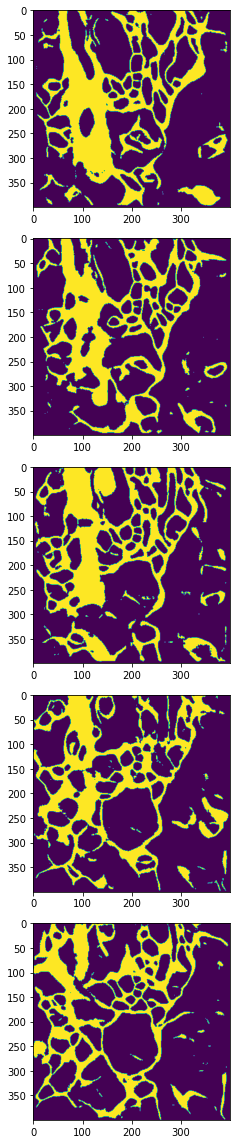

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(5,1, figsize=(4,16))
ax[0].imshow(mem_seg[:,:,0])
ax[1].imshow(mem_seg[:,:,1])
ax[2].imshow(mem_seg[:,:,2])
ax[3].imshow(mem_seg[:,:,3])
ax[4].imshow(mem_seg[:,:,4])

plt.tight_layout()
plt.show()



In [5]:
merges

,EP,root_id,seg_id,Weight,Merge Locations
0,"[108958.0, 194091.0, 22035.0]",864691135491236447,864691133681785004,101.0,"[(99, 123, 5), (104, 107, 1), (104, 107, 2), (..."
1,"[108958.0, 194091.0, 22035.0]",864691135491236447,864691133681785772,163.0,"[(105, 107, 1), (105, 117, 6), (105, 117, 7), ..."
2,"[108958.0, 194091.0, 22035.0]",864691135491236447,864691133681786540,147.0,"[(109, 86, 3), (109, 86, 4), (109, 86, 5), (10..."
3,"[108958.0, 194091.0, 22035.0]",864691135491236447,864691134418610069,43.0,"[(113, 91, 8), (113, 96, 3), (114, 96, 3), (11..."
4,"[108958.0, 194091.0, 22035.0]",864691135491236447,864691133681786028,91.0,"[(130, 134, 3), (131, 134, 6), (136, 118, 2), ..."
5,"[108958.0, 194091.0, 22035.0]",864691135491236447,864691134418610325,2.0,"[(168, 89, 3), (168, 89, 4)]"


In [6]:
seg_ids

[864691133681785004,
 864691133681785772,
 864691133681786540,
 864691134418610069,
 864691133681786028,
 864691134418610325]

In [7]:
compute_vectors.shape

(200, 200, 20, 3)